# Medical Research Drug Classifier

A medical researcher is compiling data for a study. With the collected data about a set of patients, all of whom suffered from the same illness,  it is requested a Decision Tree model to find out which drug might be appropriate for a future patient with the same illness.
Each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Dataset: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

- Features: Age, Sex, Blood Pressure, and Cholesterol of patients.
- Target: the drug that each patient responded to.


In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv")

print(df.shape)
df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [4]:
# Features to array
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [5]:
# Label Encoding for categorical features
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])

X[:,1] = le_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])

X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])

X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
# Target to array
y = df["Drug"].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [7]:
# Data split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print('X train shape:',X_train.shape, 'y train shape:',y_train.shape)
print('X test shape:',X_test.shape, 'y test shape:',y_test.shape)

X train shape: (140, 5) y train shape: (140,)
X test shape: (60, 5) y test shape: (60,)


Text(0,0.5,'model_score')

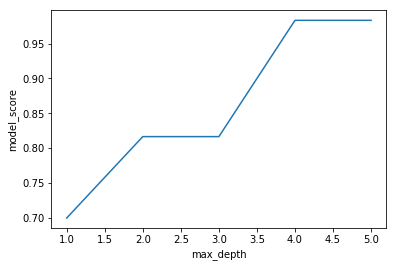

In [45]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    
plt.plot(max_depth_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('model_score')

In [48]:
# Modeling
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#Training
drugTree.fit(X_train,y_train)

#Predictions
predTree = drugTree.predict(X_test)

# Accuracy - Jaccard
acc = jaccard_score(y_test,predTree, average='macro') # 'macro' better result than 'micro' or 'weighted'
print('Decision Tree model accuracy:',acc)

Decision Tree model accuracy: 0.9817805383022774


##### **Accuracy does not change for higher values of max_depth, as shown on graph**